<a href="https://colab.research.google.com/github/Isaezc/trabajo_3_analitica/blob/main/trabajo_3_Analitica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Definición del problema**




## Importacion de librerias


In [ ]:
from PIL import Image
from glob import glob
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import *
from pathlib import Path
from shutil import copyfile, rmtree
from skimage import feature, io
from skimage import io, transform
from skimage.feature import hog
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from tensorflow import keras
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import itertools
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import seaborn as sns
import shutil
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix, precision_recall_curve, auc, roc_curve
from tensorflow.keras import layers, models
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib.patches import Wedge
from skimage import io, transform


# Análisis descriptivo y exploratorio

In [ ]:
!git clone https://github.com/Isaezc/trabajo_3_analitica.git
%cd trabajo_3_analitica


Cloning into 'trabajo_3_analitica'...
remote: Enumerating objects: 702, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 702 (delta 11), reused 53 (delta 2), pack-reused 619
Receiving objects: 100% (702/702), 776.49 KiB | 1.23 MiB/s, done.
Resolving deltas: 100% (23/23), done.
/content/trabajo_3_analitica


In [ ]:
without = "imagenes/without"
withh = 'imagenes/withh'
print("Cantidad de imagenes sin gafas:", len(os.listdir(without)))
print("Cantidad de imagenes con gafas:", len(os.listdir(withh)))

Cantidad de imagenes sin gafas: 305
Cantidad de imagenes con gafas: 294


#Cargar y Preprocesar Imágenes

In [ ]:
dataset_dir = 'imagenes'
X = []
y = []
for label, category in enumerate(['withh','without']):
    category_dir=os.path.join(dataset_dir,category)
    for filename in os.listdir(category_dir):
        img_path=os.path.join(category_dir,filename)
        if os.path.isfile(img_path):
            img = io.imread(img_path)
            img = transform.resize(img,(64,64,3)).flatten()
            X.append(img)
            y.append(label)
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Previsualizacion del dataset


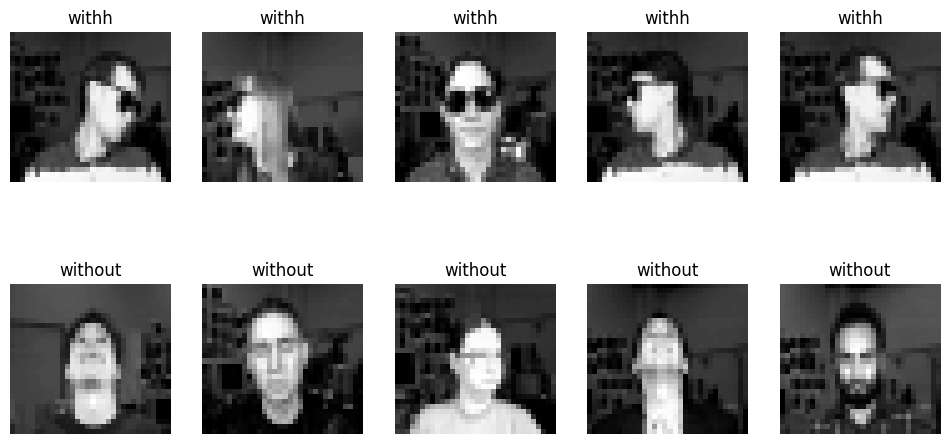

In [ ]:
fig,axes=plt.subplots(2,5,figsize=(12,6))
for label, category in enumerate(['withh','without']):
    category_dir=os.path.join(dataset_dir,category)
    image_files=os.listdir(category_dir)[:5]
    for i,filename in enumerate(image_files):
        img_path=os.path.join(category_dir, filename)
        img=io.imread(img_path)
        axes[label, i].imshow(img, cmap='gray')
        axes[label, i].set_title(category)
        axes[label, i].axis('off')
plt.show()

##Construir y Entrenar el Modelo

In [ ]:
model = models.Sequential([
    layers.Dense(4096,activation='relu',input_shape=(64*64*3,),kernel_initializer='glorot_uniform',bias_initializer='zeros'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
15/15 [==============================] - 15s 972ms/step - loss: 8.6231 - accuracy: 0.4823 - val_loss: 1.8556 - val_accuracy: 0.5500
Epoch 2/10
15/15 [==============================] - 15s 988ms/step - loss: 2.4123 - accuracy: 0.6096 - val_loss: 1.6366 - val_accuracy: 0.6000
Epoch 3/10
15/15 [==============================] - 14s 959ms/step - loss: 1.3332 - accuracy: 0.7098 - val_loss: 1.0489 - val_accuracy: 0.6833
Epoch 4/10
15/15 [==============================] - 14s 964ms/step - loss: 1.1664 - accuracy: 0.6952 - val_loss: 1.1632 - val_accuracy: 0.6083
Epoch 5/10
15/15 [==============================] - 14s 959ms/step - loss: 0.8925 - accuracy: 0.6994 - val_loss: 1.0100 - val_accuracy: 0.6167
Epoch 6/10
15/15 [==============================] - 14s 945ms/step - loss: 0.7157 - accuracy: 0.7349 - val_loss: 0.6417 - val_accuracy: 0.7083
Epoch 7/10
15/15 [==============================] - 14s 914ms/step - loss: 0.7036 - accuracy: 0.7411 - val_loss: 1.1366 - val_accuracy: 0.6250

#Testing

4/4 [==============================] - 1s 150ms/step


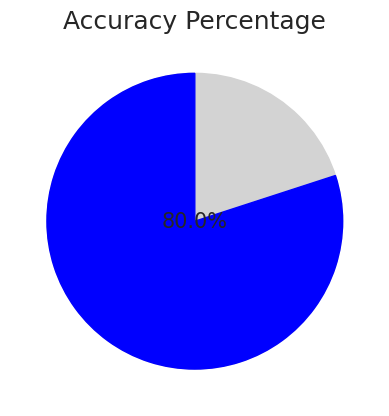

In [ ]:
predictions = model.predict(X_test)
threshold = 0.5
predicted_classes = (predictions>threshold).astype(int)
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, predicted_classes)
report = classification_report(y_test, predicted_classes)
percentage = round(accuracy * 100, 1)
fig, ax = plt.subplots()
circle = plt.Circle((0.5, 0.5), 0.4, color='lightgrey')
ax.add_artist(circle)
wedge = Wedge((0.5, 0.5), 0.4, 90, 90 + 360 * (percentage / 100), color='blue')
ax.add_artist(wedge)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.axis('off')
plt.text(0.5, 0.5, f'{percentage}%', horizontalalignment='center', verticalalignment='center', fontsize=15)
plt.title("Accuracy Percentage", fontsize=18)
plt.show()


#Predicción

In [ ]:
img_path = 'imagenes/without/choon_straight_angry_open_4.pgm'
imagen_1 = io.imread(img_path)
imagen_1 = transform.resize(imagen_1,(64,64,3)).flatten()
imagen_1 = np.expand_dims(imagen_1,axis=0)
prediction = model.predict(imagen_1)
threshold = 0.5
predicted_class = (prediction > threshold).astype(int)
print(f'La probabilidad de que esta imagen contenga un rostro con gafas es de: {prediction[0][0]}')
if predicted_class[0][0]==1:
  print("La Imagen SI contiene unas gafas")
else:
  print("La Imagen NO contiene unas gafas")

1/1 [==============================] - 0s 79ms/step
La probabilidad de que esta imagen contenga un rostro con gafas es de: 0.38773882389068604
La Imagen NO contiene unas gafas


In [ ]:
img_path = 'imagenes/without/karyadi_right_angry_open_4.pgm'
imagen_1 = io.imread(img_path)
imagen_1 = transform.resize(imagen_1,(64,64,3)).flatten()
imagen_1 = np.expand_dims(imagen_1,axis=0)
prediction = model.predict(imagen_1)
threshold = 0.5
predicted_class = (prediction > threshold).astype(int)
print(f'La probabilidad de que esta imagen contenga un rostro con gafas es de: {prediction[0][0]}')
if predicted_class[0][0]==1:
  print("La Imagen SI contiene unas gafas")
else:
  print("La Imagen NO contiene unas gafas")

1/1 [==============================] - 0s 40ms/step
La probabilidad de que esta imagen contenga un rostro con gafas es de: 0.014785616658627987
La Imagen NO contiene unas gafas


In [ ]:
img_path2 = 'imagenes/without/an2i_left_angry_open_4.pgm'
imagen_2 = io.imread(img_path2)
imagen_2 = transform.resize(imagen_2, (64, 64, 3)).flatten()
imagen_2 = np.expand_dims(imagen_2, axis=0)
prediction2 = model.predict(imagen_2)
threshold = 0.5
predicted_class2 = (prediction > threshold).astype(int)
print(f'Probabilidad de tener gafas: {prediction2[0][0]}')
if predicted_class[0][0]==1:
  print("La Imagen SI contiene unas gafas")
else:
  print("La Imagen NO contiene unas gafas")

1/1 [==============================] - 0s 62ms/step
Probabilidad de tener gafas: 0.7224945425987244
La Imagen NO contiene unas gafas


In [ ]:
img_path2 = 'imagenes/withh/mitchell_left_happy_sunglasses_4.pgm'
imagen_2 = io.imread(img_path2)
imagen_2 = transform.resize(imagen_2, (64, 64, 3)).flatten()
imagen_2 = np.expand_dims(imagen_2, axis=0)
prediction2 = model.predict(imagen_2)
threshold = 0.5
predicted_class2 = (prediction > threshold).astype(int)
print(f'Probabilidad de tener gafas: {prediction2[0][0]}')
if predicted_class[0][0]==1:
  print("La Imagen SI contiene unas gafas")
else:
  print("La Imagen NO contiene unas gafas")

1/1 [==============================] - 0s 59ms/step
Probabilidad de tener gafas: 0.46919816732406616
La Imagen NO contiene unas gafas


# Precisión, recall y F1-score

In [ ]:
precision = precision_score(y_test, predicted_classes)
recall = recall_score(y_test, predicted_classes)
f1 = f1_score(y_test, predicted_classes)
print(f'Precision:{precision}')
print(f'Recall:{recall}')
print(f'F1-score:{f1}')
roc_auc = roc_auc_score(y_test, predictions)
print(f'Área bajo la curva: {roc_auc}')

Precision:0.7083333333333334
Recall:0.8793103448275862
F1-score:0.7846153846153847
Área bajo la curva: 0.8548387096774193


# Matriz de Confusión

<Figure size 800x600 with 0 Axes>

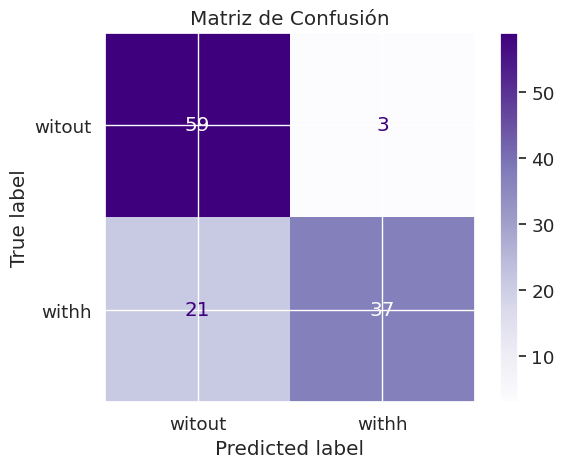

In [ ]:
cm = confusion_matrix(y_test, predicted_classes)
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['witout', 'withh']).plot(cmap='Purples')
plt.title('Matriz de Confusión')
plt.show()

# Curva de Precisión-Recall

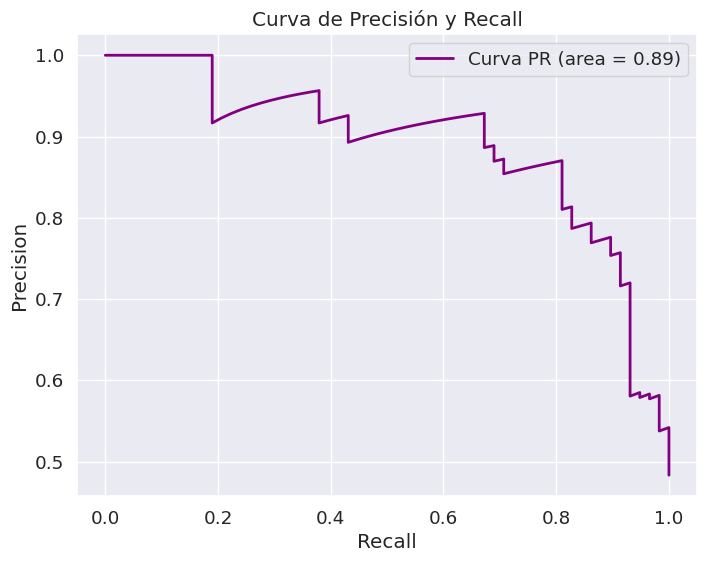

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, predictions)
area_under_curve = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label='Curva PR (area = {:.2f})'.format(area_under_curve))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisión y Recall')
plt.legend(loc='upper right')
plt.show()

#Receiver operating characteristic curve

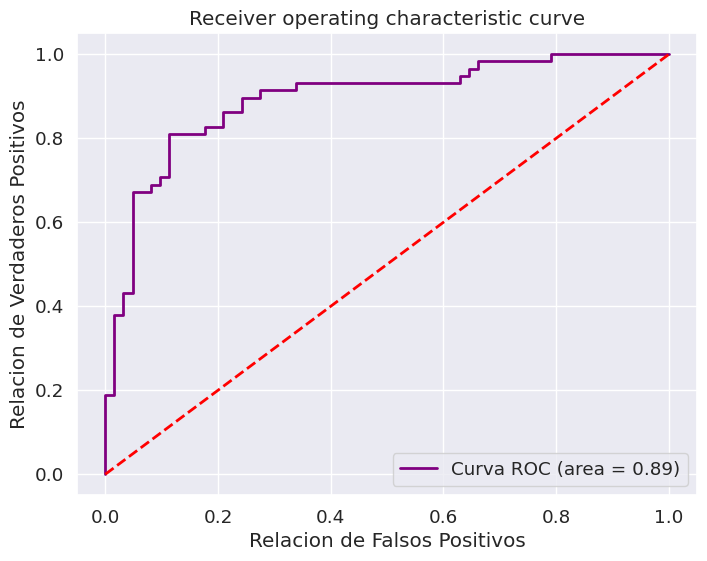

In [ ]:
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2, label='Curva ROC (area = {:.2f})'.format(roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('Relacion de Falsos Positivos')
plt.ylabel('Relacion de Verdaderos Positivos')
plt.title('Receiver operating characteristic curve')
plt.legend(loc='lower right')
plt.show()